In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Load the dataset
file_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Tsunami_Cut.csv'
tsunami_data = pd.read_csv(file_path)
tsunami_data.head()

,Year,Mo,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Vol,Deposits,Country,Location Name,Latitude,...,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Total Deaths,Total Death Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
0,-2000,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN
1,-1610,NaN,4,6.0,NaN,1351.0,28,GREECE,THERA ISLAND (SANTORINI),36.400,...,NaN,3.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
2,-1365,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,-1300,NaN,2,0.0,6.0,NaN,0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-760,NaN,2,0.0,NaN,NaN,0,ISRAEL,ISRAEL AND LEBANON COASTS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Preprocess the data
# Encode the 'Country' column
le_country = LabelEncoder()
tsunami_data['Country_encoded'] = le_country.fit_transform(tsunami_data['Country'])

In [82]:
# Drop rows where 'Month' has no value
tsunami_data = tsunami_data.dropna(subset=['Mo'])

In [83]:
# Encode the 'Total Damage Description' column
le_damage = LabelEncoder()
tsunami_data['Total Damage Description'] = le_damage.fit_transform(tsunami_data['Total Damage Description'].astype(str))

In [84]:
# Select relevant columns for clustering
features = ['Country_encoded', 'Mo', 'Total Damage Description']
X = tsunami_data[features]

In [85]:
# Apply clustering methods
def apply_clustering(X, method, n_clusters=4):
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'birch':
        model = Birch(n_clusters=n_clusters)
    else:
        raise ValueError("Unsupported clustering method")
    
    labels = model.fit_predict(X)
    return labels

In [86]:
# Apply PCA for visualization
def plot_pca(X, labels, title, save_path):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=labels, palette='rainbow')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

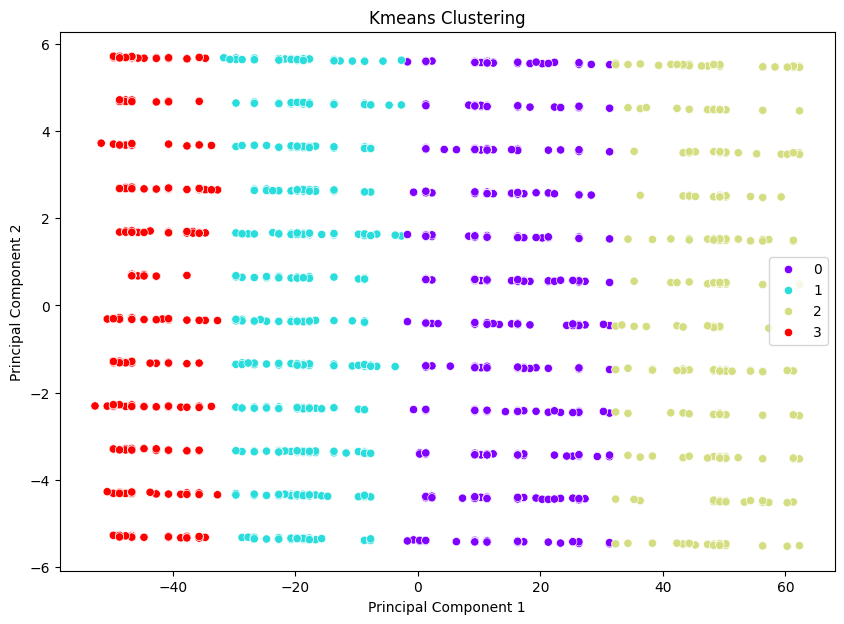

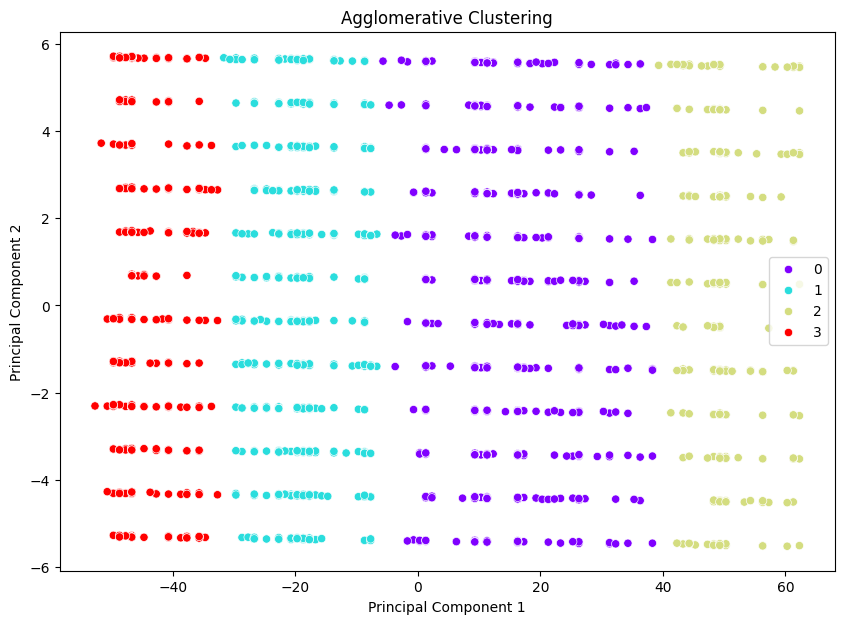

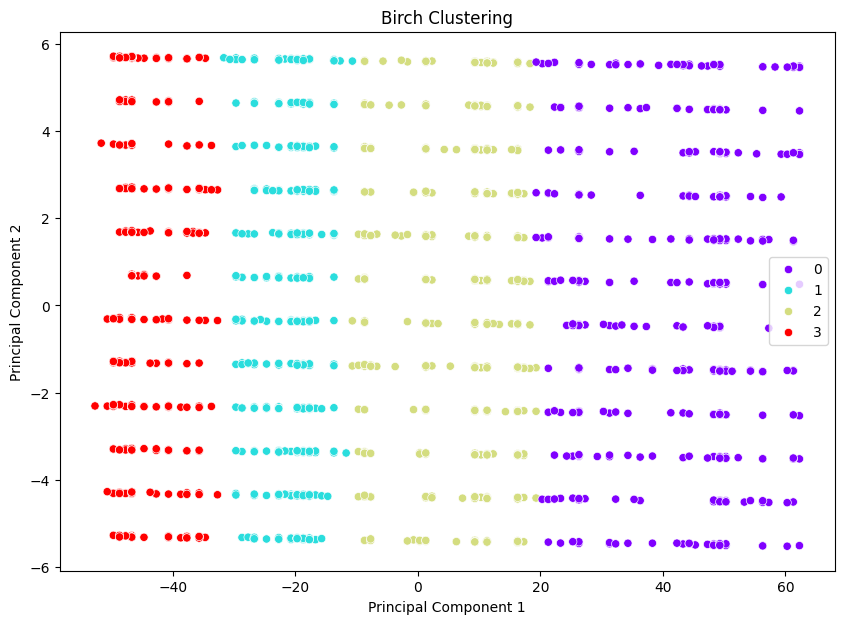

In [87]:
# Clustering methods and results storage
clustering_methods = ['kmeans', 'agglomerative', 'birch']
results = []

for method in clustering_methods:
    labels = apply_clustering(X, method)
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    results.append({
        'method': method,
        'silhouette_score': silhouette_avg,
        'davies_bouldin_index': davies_bouldin,
        'calinski_harabasz_index': calinski_harabasz
    })
    
    plot_pca(X, labels, f'{method.capitalize()} Clustering', f'{method}_clustering_pca.png')

In [88]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [89]:
# Add cluster labels to the original data
X['KMeans_Labels'] = apply_clustering(X, 'kmeans')
X['Agglomerative_Labels'] = apply_clustering(X, 'agglomerative')
X['Birch_Labels'] = apply_clustering(X, 'birch')

C:\Users\ungdu\AppData\Local\Temp\ipykernel_2976\2131499018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['KMeans_Labels'] = apply_clustering(X, 'kmeans')
C:\Users\ungdu\AppData\Local\Temp\ipykernel_2976\2131499018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Agglomerative_Labels'] = apply_clustering(X, 'agglomerative')
C:\Users\ungdu\AppData\Local\Temp\ipykernel_2976\2131499018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [90]:
# Map back the encoded 'Country' to original names
X['Country'] = le_country.inverse_transform(X['Country_encoded'])

C:\Users\ungdu\AppData\Local\Temp\ipykernel_2976\3092058019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country'] = le_country.inverse_transform(X['Country_encoded'])


In [91]:
# Export the clustering results and scores to an Excel file
output_file_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Clustering_Results.xlsx'

In [92]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(output_file_path, engine='xlsxwriter')

In [93]:
# Write each dataframe to a different worksheet.
X.to_excel(writer, sheet_name='Clusters', index=False)
results_df.to_excel(writer, sheet_name='Scores', index=False)

In [94]:
# Close the Pandas Excel writer and output the Excel file.
writer.close()